Data source: https:<span></span>//www.oecd-ilibrary.org/social-issues-migration-health/health-at-a-glance-2017/life-expectancy-at-birth-and-gdp-per-capita-2015-or-nearest-year_health_glance-2017-graph7-en

## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

% matplotlib inline

#Data preparation

df = pd.read_csv('gdp_life_expectancy.csv', sep =';')

df['Life expectancy at birth'] = df['Life expectancy at birth'].map(lambda x: x.replace(',','.')).astype(float)
Y = df['Life expectancy at birth'].values

X = df[['GDP per capita']].values

country_codes = df['Code']


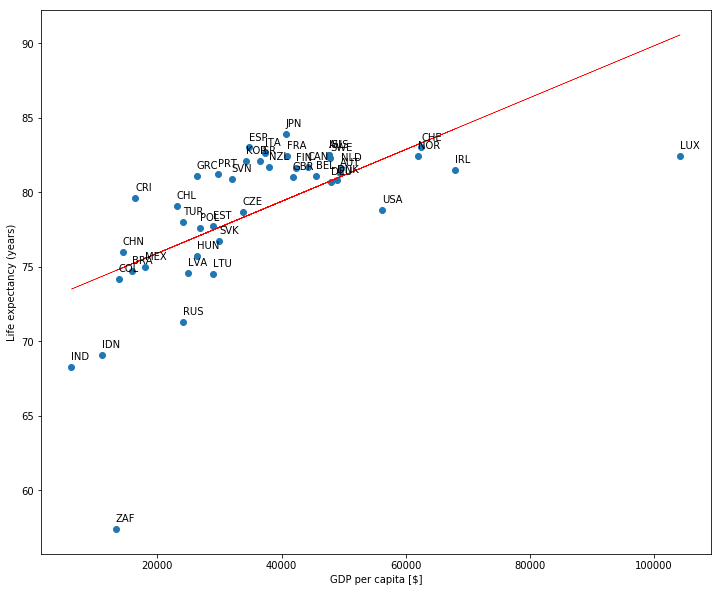

In [2]:
#Linear Regression Model

model = LinearRegression()
model.fit(X, Y)

#Data visualization

plt.figure(figsize=(12,10))
plt.xlabel('GDP per capita [$]')
plt.ylabel('Life expectancy (years)')
plt.scatter(X,Y)
for i, txt in enumerate(country_codes):
    plt.annotate(txt, (X[i], Y[i]),xytext=(X[i]+0.5, Y[i]+0.5))
plt.plot(X,model.predict(X), 'r-', linewidth = 0.5)    
plt.show()

The red line is linear regression model. Below there are coeficient and intercept values

In [3]:
print(model.coef_)
print(model.intercept_)

[ 0.00017393]
72.4269604533


There is also another approach to draw a plot and get these values

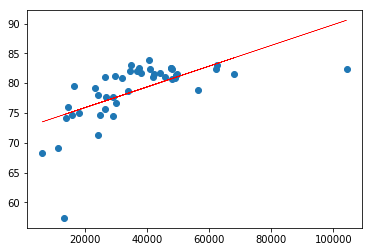

In [4]:
#reshape the X
X1 = df['GDP per capita'].values
poly = np.polyfit(X1,Y,1)
plt.scatter(X1,Y)
plt.plot(X1,np.polyval(poly,X1),'r-',linewidth =0.5)

In [5]:
print(poly) #coeficient and intercept

[  1.73928407e-04   7.24269605e+01]


For Cyprus GPD per capita is 23,075$ while life expectancy is 80,31 years (2015). Let's see what the model predicts:

In [6]:
X_CYP = [[23075]]
print(model.predict(X_CYP))

[ 76.44035845]


## k-Nearest Neighbors
This algorithm takes k closes values (in this case GDP per capita) to provided one, average them and then predict what target value may be

In [7]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors = 2)
model_knn.fit(X,Y)
print(model_knn.predict(X_CYP))

[ 78.55]
